# Bigmart Sales prediction<br>

# Case details <br>
we have data point of 10 bigmart store from 10 different cities. it was taken in the year of 2013. dataset has various columns whcih provids the details the store, store location, prodcuts details, size of the store and many more columns. Basis the available data points we have to predict the sales of the stores. A regression problem.

**Features description:**<br>
Item_Identifier == is the unique product ID<br>
Item_Weight <br>
Item_Fat_Content == weather the product has low or high fat<br>
Item_Visibility = The % of total display area of all product in a store alloted to a particular product<br>
Item_MRP<br>
Outlet_Identifier == store iD<br>
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type == type of city in which store is located
Outlet_Type  === is store a grocery store or super market
Item_Outlet_Sales == sales of the store 

**We have similar informaton in our test dataset as well, the only difference is that it doesnt have any target variable**


In [1]:
import pandas as pd
bigmart_train_ds = pd.read_csv("Bigdatamart_train.csv")
bigmart_test_ds =  pd.read_csv("Bigdatamart_test.csv")
bigmart_train_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
print("Train data shape",bigmart_train_ds.shape,"," "Test Data shape", bigmart_test_ds.shape)

Train data shape (8523, 12) ,Test Data shape (5681, 11)


In [3]:
bigmart_test_ds.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
def check_data_info(x):
    return x.info()

print("Training Dataset information\n")
check_data_info(bigmart_train_ds)
print("\n")
print("Test Dataset information\n")
check_data_info(bigmart_test_ds)


Training Dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Test Dataset 

**Training data** has 8523 observations and 12 columns, 7 columns belong to  object datatype , 4 are float and 1 is INT.<br>
we have similar data points in test also except the target column, it has 568 observations and 11 columns <br>
Missing values are observed in both the dataset.will check  and impute them 

# finding missing value 

In [5]:
def find_missing_val(x):
    missing_val= {}
    for i in x.columns:
        if x[i].isnull().sum()> 0:
            missing_val[i] = x[i].isnull().sum()
    print(missing_val)
            
    
        
        

In [6]:
print("Training Dataset missing information\n")
find_missing_val(bigmart_train_ds)
print("\n")
print("Test Dataset missing information\n")
find_missing_val(bigmart_test_ds)

Training Dataset missing information

{'Item_Weight': 1463, 'Outlet_Size': 2410}


Test Dataset missing information

{'Item_Weight': 976, 'Outlet_Size': 1606}


Item_weight and outlet_size have missing value in both training and test data set 

In [7]:
object_data = bigmart_train_ds.select_dtypes(include = "object")
for i in object_data.columns:
    print(f'{i}, {object_data[i].value_counts()}\n')

Item_Identifier, FDW13    10
FDG33    10
DRE49     9
NCB18     9
FDX31     9
         ..
FDN52     1
FDY43     1
DRF48     1
FDO33     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content, Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type, Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier, OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    5

Fat_content columsn's category has multiple names of a single category. 15 top categories' name are given in the dataset and a few of item types are given in others.<br>As said it is comprising 10 stores data, we can see that.We have two kind of store size A=small and B= high.<br>Assuming high store will have every necessery things available under one roof looking at the customer behavior and sales will also high.Dataset has 3 types of store's 1 Grocery 2 Supermarket type2 and supermarket type 2.  

In [8]:

bigmart_train_ds.groupby("Item_Type").mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Baking Goods,12.277108,0.069169,126.380766,1997.728395,1952.971207
Breads,11.346936,0.066255,140.952669,1997.657371,2204.132226
Breakfast,12.768202,0.085723,141.788151,1997.336364,2111.808651
Canned,12.305705,0.068129,139.763832,1998.152542,2225.194904
Dairy,13.426069,0.072427,148.499208,1997.681818,2232.542597
Frozen Foods,12.867061,0.065645,138.503366,1998.024533,2132.867744
Fruits and Vegetables,13.224769,0.068513,144.581235,1997.719968,2289.009592
Hard Drinks,11.400328,0.064943,137.077928,1998.177570,2139.221622
Health and Hygiene,13.142314,0.055216,130.818921,1997.734615,2010.000265


# Imputing missing value

In [9]:
def impute_weight(x):
    Item_Weight  = x[0]
    Item_Type = x[1]
    
    if pd.isnull(Item_Weight):
        if Item_Type == "Baking Goods":
            return  12.277108
        elif Item_Type == "Breads":
            return 11.346936
        elif Item_Type == "Breakfast":
            return 12.768202
        elif Item_Type == "Canned":
            return 12.305705
        elif Item_Type == "Dairy":
            return 13.426069
        elif Item_Type == "Frozen Foods":
            return 12.867061
        elif Item_Type == "Fruits and Vegetables":
            return 13.224769
        elif Item_Type == "Hard Drinks":
            return 11.400328
        elif Item_Type == "Health and Hygiene":
            return 13.142314
        elif Item_Type == "Household":
            return 13.384736
        elif Item_Type == "Meat":
            return 12.817344
        elif Item_Type == "Others":
            return 13.853285
        elif Item_Type == "Seafood": 
            return 12.552843
        elif Item_Type == "Snack Foods":
            return 12.987880
        elif Item_Type == "Soft Drinks":
            return 11.847460
        elif Item_Type == "Starchy Foods":
            return 13.690731
    else:
        return Item_Weight
        
        

In [10]:
bigmart_train_ds["Item_Weight"] = bigmart_train_ds[["Item_Weight","Item_Type"]].apply(impute_weight,axis =1)
bigmart_test_ds["Item_Weight"] = bigmart_test_ds[["Item_Weight","Item_Type"]].apply(impute_weight,axis =1)

In [11]:
def impute_Outlet_Size(x):
    x["Outlet_Size"] = x["Outlet_Size"].fillna(x["Outlet_Size"].mode()[0])

In [12]:
impute_Outlet_Size(bigmart_train_ds)
impute_Outlet_Size(bigmart_test_ds)

In [13]:
print("Training Dataset missing information post imputation\n")
find_missing_val(bigmart_train_ds)
print("\n")
print("Test Dataset missing information post imputation\n")
find_missing_val(bigmart_test_ds)

Training Dataset missing information post imputation

{}


Test Dataset missing information post imputation

{}


We had two columns with missing value, item_weight and outlet_size, item_weight has beem inputed with the mean value of each item_type and outlet_size has been imputed with mode value

In [14]:
# we have some observations from item_fat_content columns double names, lets correct them
def observation_correction(x):
    x["Item_Fat_Content"] = x["Item_Fat_Content"].replace({"reg":"Regular", "Low Fat":"LF","low fat" :"LF"})
observation_correction(bigmart_train_ds)
observation_correction(bigmart_test_ds)

In [15]:
bigmart_train_ds["Item_Fat_Content"].value_counts()

LF         5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
bigmart_test_ds["Item_Fat_Content"].value_counts()

LF         3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [17]:
bigmart_train_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


since Outlet_Establishment_Year in year format and it reflects the opening of store year, we can convert into into that how many year store is operating, since data was collted in 2013 so till then we can take out the age of the store. let do it

In [18]:
bigmart_train_ds["Outlet_Establishment_Year"] = 2013-  bigmart_train_ds["Outlet_Establishment_Year"] 

In [19]:
bigmart_test_ds["Outlet_Establishment_Year"] = 2013- bigmart_test_ds["Outlet_Establishment_Year"] 

In [20]:
bigmart_train_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,15.168133,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,4.000000,33.290000
25%,9.310000,0.026989,93.826500,9.000000,834.247400
50%,12.867061,0.053931,143.012800,14.000000,1794.331000
75%,16.000000,0.094585,185.643700,26.000000,3101.296400
max,21.350000,0.328391,266.888400,28.000000,13086.964800


In [21]:
bigmart_test_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.724373,0.065684,141.023273,15.171097
std,4.252665,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,4.000000
25%,9.195000,0.027047,94.412000,9.000000
50%,12.867061,0.054154,141.415400,14.000000
75%,15.850000,0.093463,186.026600,26.000000
max,21.350000,0.323637,266.588400,28.000000


In [22]:
bigmart_train_ds.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4305,FDL58,5.780,Regular,0.074087,Snack Foods,264.9568,OUT013,26,High,Tier 3,Supermarket Type1,6855.0768
3632,FDT03,21.250,LF,0.010039,Meat,181.7608,OUT018,4,Medium,Tier 3,Supermarket Type2,1102.5648
6248,FDW34,9.600,LF,0.035579,Snack Foods,244.4170,OUT046,16,Small,Tier 1,Supermarket Type1,1944.1360
7555,FDB52,17.750,LF,0.030410,Dairy,256.0672,OUT013,26,High,Tier 3,Supermarket Type1,2045.3376
3248,FDR25,17.000,Regular,0.139805,Canned,265.7884,OUT045,11,Medium,Tier 2,Supermarket Type1,3974.8260
4983,NCN05,8.235,LF,0.014457,Health and Hygiene,184.7950,OUT035,9,Small,Tier 2,Supermarket Type1,1464.7600
5396,DRM23,16.600,LF,0.136286,Hard Drinks,171.4422,OUT018,4,Medium,Tier 3,Supermarket Type2,2241.7486
4890,FDB10,10.000,LF,0.067482,Snack Foods,234.8590,OUT018,4,Medium,Tier 3,Supermarket Type2,1181.7950
5969,DRG25,10.500,LF,0.019034,Soft Drinks,185.6240,OUT013,26,High,Tier 3,Supermarket Type1,6897.6880
3813,FDV11,9.100,Regular,0.136695,Breads,173.4054,OUT010,15,Medium,Tier 3,Grocery Store,875.5270


# univaruate analysis

In [23]:
import matplotlib.pyplot as plt

# train data
bigmart_train_ds.select_dtypes(exclude = "object").hist(figsize=(10,8));

item_outlet_sales amd item_visibility are right skewed data. item_weighate seems normally distributed and MRP is left skewed 

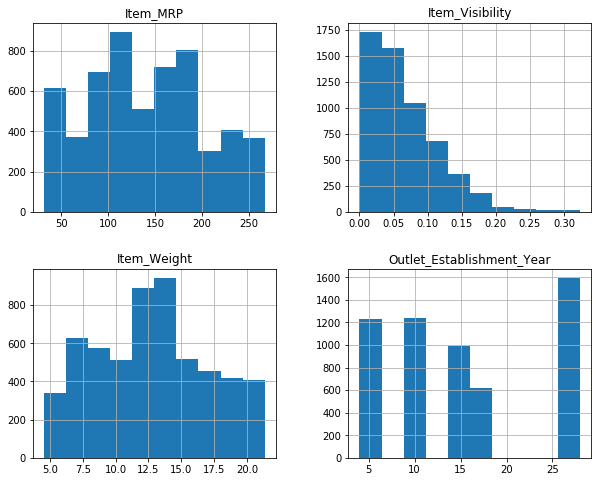

In [24]:
# test data 
bigmart_test_ds.select_dtypes(exclude = "object").hist(figsize=(10,8));

it has same observation as train data 

In [25]:
# train data
bigmart_train_ds.select_dtypes(exclude = "object").skew()

Item_Weight                  0.089537
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year    0.396641
Item_Outlet_Sales            1.177531
dtype: float64

As mentioned item_visibility and sales are right skewed distribution and we can see clearly from skewness.

In [26]:
# test  data
bigmart_test_ds.select_dtypes(exclude = "object").skew()

Item_Weight                  0.121744
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year    0.396306
dtype: float64

In [27]:
# treating skewness
import numpy as np
def treat_skewness(x):
    x["Item_Visibility"] =  np.sqrt(x["Item_Visibility"])

In [28]:
treat_skewness(bigmart_train_ds)

In [29]:
treat_skewness(bigmart_test_ds)

In [30]:
# train data
bigmart_train_ds.select_dtypes(exclude = "object").skew()

Item_Weight                  0.089537
Item_Visibility             -0.098056
Item_MRP                     0.127202
Outlet_Establishment_Year    0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [31]:
bigmart_test_ds.select_dtypes(exclude = "object").skew()

Item_Weight                  0.121744
Item_Visibility             -0.094941
Item_MRP                     0.136182
Outlet_Establishment_Year    0.396306
dtype: float64

we have treated the skewned with by sqrt fucntion and after its treatment it look close to normal 

# boxplot outlier detection

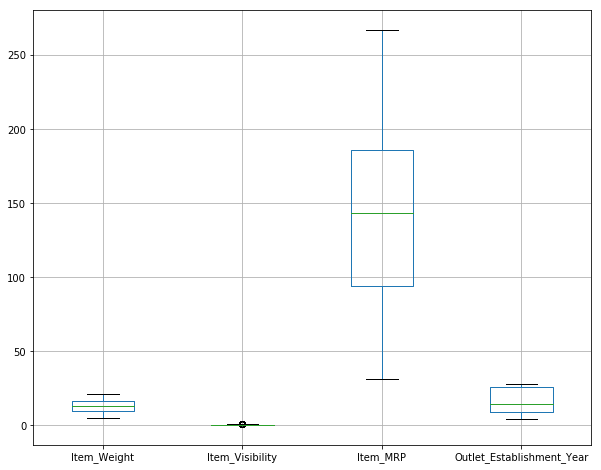

In [32]:
bigmart_train_ds[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year"]].boxplot(figsize=(10,8))

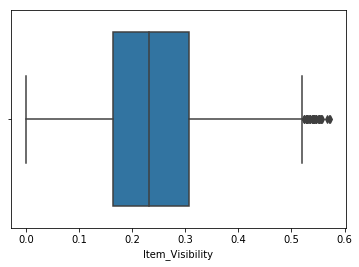

In [33]:
import seaborn as sns
sns.boxplot(bigmart_train_ds["Item_Visibility"])

other than item_visibility no columns have outlier. item_visibility has max value close to its whiskers and that is fine

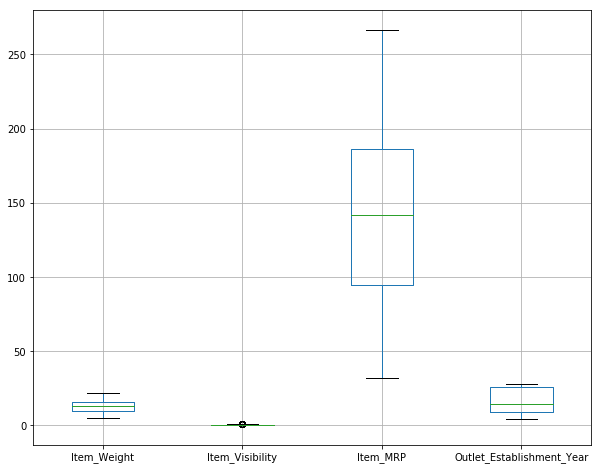

In [34]:
# test data 
bigmart_test_ds[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year"]].boxplot(figsize=(10,8))

we have same observation for test dataset also in terms of outlier observations

# Bivariate analysis

In [35]:
one_bigmart_data2 = pd.concat([bigmart_train_ds,bigmart_test_ds], sort = False) # creating a data for visu;aization purpose

In [36]:
one_bigmart_data2.shape

(14204, 12)

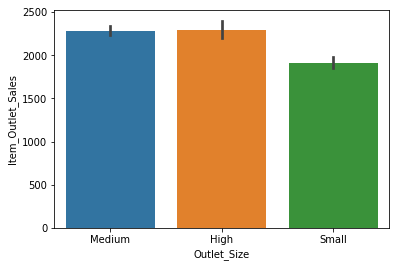

In [37]:
sns.barplot(x =one_bigmart_data2["Outlet_Size"], y = one_bigmart_data2["Item_Outlet_Sales"])

Medium and high size outlet have more sale than small and that is obvious 

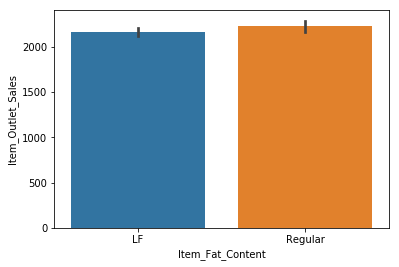

In [38]:
sns.barplot(x =one_bigmart_data2["Item_Fat_Content"], y = one_bigmart_data2["Item_Outlet_Sales"])

people are used to buying both the product frequently  

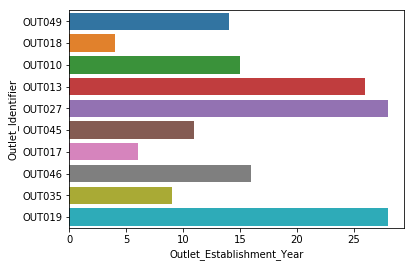

In [39]:
sns.barplot(x =one_bigmart_data2["Outlet_Establishment_Year"], y = one_bigmart_data2["Outlet_Identifier"])

outlet 19,27 and 13 are too old 

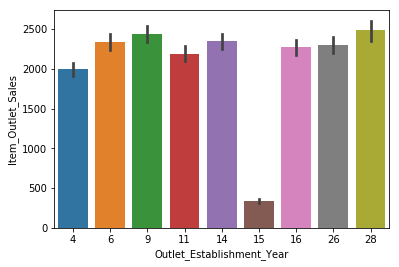

In [40]:
sns.barplot(x =one_bigmart_data2["Outlet_Establishment_Year"], y = one_bigmart_data2["Item_Outlet_Sales"])

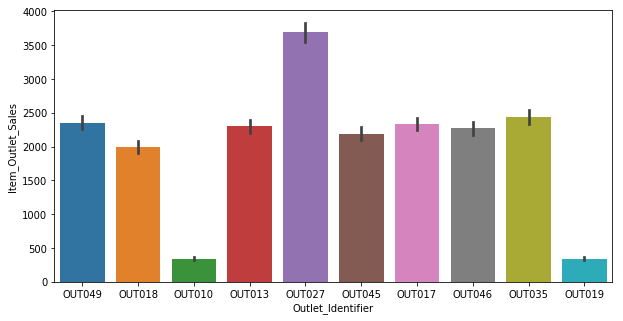

In [41]:
plt.figure(figsize =(10,5))
sns.barplot(x =one_bigmart_data2["Outlet_Identifier"], y = one_bigmart_data2["Item_Outlet_Sales"])

outlet 27 has the highest sale and 10 and 19 are lowest sale. outlet 19 is too old even though sales are low

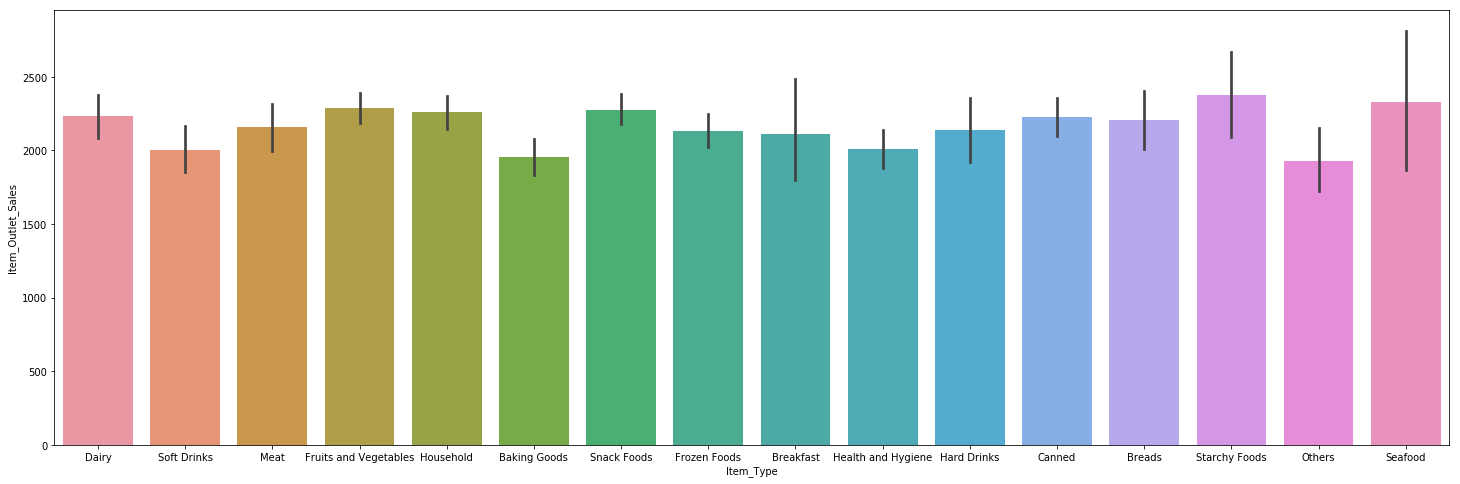

In [42]:
plt.figure(figsize =(25,8))
sns.barplot(x =one_bigmart_data2["Item_Type"], y = one_bigmart_data2["Item_Outlet_Sales"])

Baking goods and other categories sales is slightly low as compare to rest of the categories

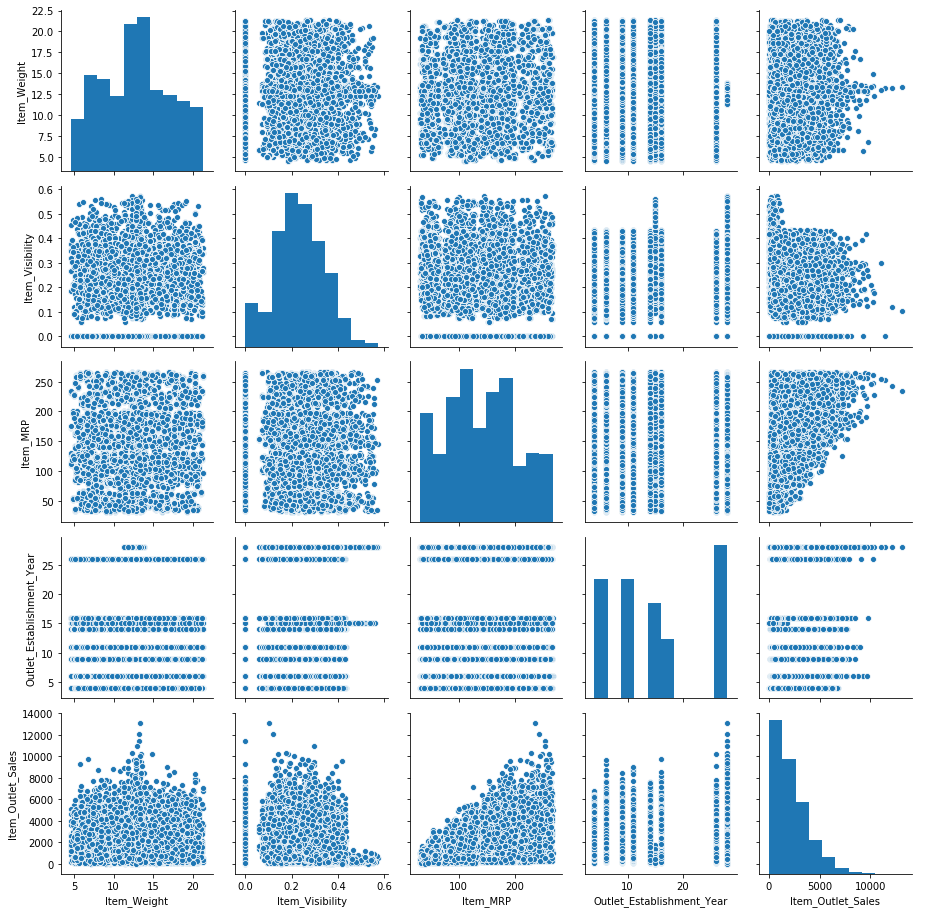

In [43]:
sns.pairplot(one_bigmart_data2)

There is no relation of any of the numerical columns to sales expect MRP

# Label encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [45]:
var_col_label = ["Item_Identifier","Item_Type","Outlet_Identifier"]
 
def lebal_encoding(x):
    for i in var_col_label:
        x[i] = LE.fit_transform(x[i])
lebal_encoding(bigmart_train_ds)
lebal_encoding(bigmart_test_ds)

In [48]:
bigmart_train_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,LF,0.126678,4,249.8092,9,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.138846,14,48.2692,3,4,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,LF,0.129461,10,141.6180,9,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,6,182.0950,0,15,Medium,Tier 3,Grocery Store,732.3800
4,1297,8.93,LF,0.000000,9,53.8614,1,26,High,Tier 3,Supermarket Type1,994.7052


In [49]:
bigmart_test_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,LF,0.086976,13,107.8622,9,14,Medium,Tier 1,Supermarket Type1
1,1067,8.300000,Regular,0.196030,4,87.3198,2,6,Medium,Tier 2,Supermarket Type1
2,1406,14.600000,LF,0.315555,11,241.7538,0,15,Medium,Tier 3,Grocery Store
3,809,7.315000,LF,0.124050,13,155.0340,2,6,Medium,Tier 2,Supermarket Type1
4,1184,13.426069,Regular,0.344383,4,234.2300,5,28,Medium,Tier 3,Supermarket Type3


In [50]:
# making dummy variable with pandas fucntions
bigmart_train_ds = pd.get_dummies(bigmart_train_ds,columns = ["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type"],drop_first=True) 
bigmart_test_ds = pd.get_dummies(bigmart_test_ds,columns = ["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type"],drop_first=True) 

In [51]:
bigmart_train_ds.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.126678,4,249.8092,9,14,3735.1380,0,1,0,0,0,1,0,0
1,8,5.92,0.138846,14,48.2692,3,4,443.4228,1,1,0,0,1,0,1,0
2,662,17.50,0.129461,10,141.6180,9,14,2097.2700,0,1,0,0,0,1,0,0
3,1121,19.20,0.000000,6,182.0950,0,15,732.3800,1,1,0,0,1,0,0,0
4,1297,8.93,0.000000,9,53.8614,1,26,994.7052,0,0,0,0,1,1,0,0


In [52]:
bigmart_test_ds.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1103,20.750000,0.086976,13,107.8622,9,14,0,1,0,0,0,1,0,0
1,1067,8.300000,0.196030,4,87.3198,2,6,1,1,0,1,0,1,0,0
2,1406,14.600000,0.315555,11,241.7538,0,15,0,1,0,0,1,0,0,0
3,809,7.315000,0.124050,13,155.0340,2,6,0,1,0,1,0,1,0,0
4,1184,13.426069,0.344383,4,234.2300,5,28,1,1,0,0,1,0,0,1


# Data is ready for modeling now

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Seprate data into train and test 

X_tr = bigmart_train_ds.drop(columns ="Item_Outlet_Sales")
y =   bigmart_train_ds["Item_Outlet_Sales"]

X_test_data = bigmart_test_ds

X_train,X_test,y_train,y_test = train_test_split(X_tr,y, test_size = 0.2, random_state = 100)

In [55]:
models = [LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),SVR()]
for model in models:
    model.fit(X_train,y_train)
    print("training score",model.score(X_train,y_train))
    pred = model.predict(X_test)
    print("test score",model.score(X_test,y_test))
    print("mean_squared_error",model,mean_squared_error(pred,y_test))
    print("RMSE",model,mean_squared_error(pred,y_test, squared=False))
    print("R2_score",model,r2_score(pred,y_test),"\n")

training score 0.5667446861505478
test score 0.5500509342603036
mean_squared_error LinearRegression() 1327494.2657063375
RMSE LinearRegression() 1152.1693737061134
R2_score LinearRegression() 0.15597011514817893 

training score 0.9380186200551189
test score 0.5603212419178888
mean_squared_error RandomForestRegressor() 1297193.5593362267
RMSE RandomForestRegressor() 1138.944054524289
R2_score RandomForestRegressor() 0.3071380596487152 

training score 0.4934602474120673
test score 0.4667889234930138
mean_squared_error AdaBoostRegressor() 1573143.9408824607
RMSE AdaBoostRegressor() 1254.250350162383
R2_score AdaBoostRegressor() -0.11329034865505028 

training score -0.0363687366291503
test score -0.0497561837203393
mean_squared_error SVR() 3097117.919308471
RMSE SVR() 1759.8630399290937
R2_score SVR() -2686.5294691248387 



Randomforest and linear regression have postive r2 score other than rest of two algorithm. Since Randomforest is overfitting model we will pick Logistic regression as final model

In [56]:
# RF = RandomForestRegressor()
# parameter = {"n_estimators": [100,200,300,400,500],
#             "max_features" : ["auto", "sqrt", "log2"],
#             "criterion" :['mse',"mae"],
#             "max_depth":[10,20,30,40,50,60,70],
#             "min_samples_split" :[2,3,4,5,6],
#             "min_samples_leaf" :[1,2,3],
#             "bootstrap" :[True,False]}

# randomgrid = RandomizedSearchCV(RF,parameter,scoring="r2",cv = 5, n_jobs =-1, verbose = 2)
# randomgrid.fit(X_train,y_train)
# randomgrid.best_params_

this could not be performed, i waited for 15 hours. just wanted to check if we tuned paramter can we save the overfitting problem

In [65]:
LR = LinearRegression()
LR.fit(X_train,y_train)
print("training score",LR.score(X_train,y_train))
pred = LR.predict(X_test)
print("test score",LR.score(X_test,y_test))
print("mean_squared_error",mean_squared_error(pred,y_test))
print("RMSE",mean_squared_error(pred,y_test, squared=False))
print("R2_score",r2_score(pred,y_test),"\n")

training score 0.5667446861505478
test score 0.5500509342603036
mean_squared_error 1327494.2657063375
RMSE 1152.1693737061134
R2_score 0.15597011514817893 



In [64]:
from sklearn.linear_model import Lasso, Ridge
ri =  Ridge()
la = Lasso()


ri.fit(X_train,y_train)
print("training score",ri.score(X_train,y_train))
pred = ri.predict(X_test)
print("test score",ri.score(X_test,y_test))
print("mean_squared_error",mean_squared_error(pred,y_test))
print("RMSE",mean_squared_error(pred,y_test, squared=False))
print("R2_score",r2_score(pred,y_test),"\n")


training score 0.5666604995142099
test score 0.5496358556428469
mean_squared_error 1328718.8809493654
RMSE 1152.7006900966815
R2_score 0.15348065039770054 



In [61]:
la.fit(X_train,y_train)
print("training score",la.score(X_train,y_train))
pred = la.predict(X_test)
print("test score",la.score(X_test,y_test))
print("mean_squared_error",mean_squared_error(pred,y_test))
print("RMSE",mean_squared_error(pred,y_test, squared=False))
print("R2_score",r2_score(pred,y_test),"\n")

training score 0.5659694260516221
test score 0.5483047353848656
mean_squared_error 1332646.1132607178
RMSE 1154.4029250052677
R2_score 0.14847412101781143 



Linear regresison is giving more accurate prediction. it train and test score are very close.

In [73]:
for i in range(1,10):
    cross_score = cross_val_score(LR, X_tr,y, scoring ="neg_mean_squared_error")
    print(i,"mean", cross_score.mean() ,"and SD", cross_score.std())

1 mean -1276853.1576036825 and SD 31757.971641231783
2 mean -1276853.1576036825 and SD 31757.971641231783
3 mean -1276853.1576036825 and SD 31757.971641231783
4 mean -1276853.1576036825 and SD 31757.971641231783
5 mean -1276853.1576036825 and SD 31757.971641231783
6 mean -1276853.1576036825 and SD 31757.971641231783
7 mean -1276853.1576036825 and SD 31757.971641231783
8 mean -1276853.1576036825 and SD 31757.971641231783
9 mean -1276853.1576036825 and SD 31757.971641231783


There is no change in the mean in cross val

In [66]:
# testing with Linear regression by using test data 

prediction = LR.predict(X_test_data)
bigmart_test_ds["Prediction "] = prediction

In [67]:
bigmart_test_ds["Prediction "] = prediction

In [69]:
bigmart_test_ds.sample(10)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Prediction
4329,848,16.850000,0.373351,13,145.9760,6,9,0,0,1,1,0,1,0,0,2421.517643
5002,316,8.710000,0.348481,3,93.6778,9,14,0,1,0,0,0,1,0,0,1576.066645
2901,1399,15.200000,0.000000,8,50.1034,1,26,0,0,0,0,1,1,0,0,911.320148
4671,1483,8.695000,0.000000,9,96.0094,0,15,0,1,0,0,1,0,0,0,-310.490929
1110,1313,15.300000,0.152013,9,103.8332,2,6,0,1,0,1,0,1,0,0,1782.422602
5119,1101,7.680000,0.266541,6,191.9162,7,11,0,1,0,1,0,1,0,0,2985.038374
3699,351,17.250000,0.398993,6,63.8194,8,16,1,0,1,0,0,1,0,0,1063.670736
1757,920,12.150000,0.207179,10,184.6950,2,6,1,1,0,1,0,1,0,0,3084.060807
2826,936,11.346936,0.284712,1,169.2816,5,28,1,1,0,0,1,0,0,1,4173.914976
67,1363,14.650000,0.268452,9,262.5594,8,16,0,0,1,0,0,1,0,0,4137.887230


**Conclusion:-**<br>
    
have tried multiple models to train the data but two of them are performed ok on the data points one is LinearRegression and Randomforest. we could not selected Ramdon forest as final one because it was overfitting and Linear regression model's score is quite close training and test score. I have tried Ridge and lasso regression also to check wheather we can have more improvement or not but linear one is woking well. So as a final one i have selected Linear regression one and tested the test data with that one and saved that model as well 

# Model saving

In [74]:
import pickle
with open("Bigmart_sale.pkl", "wb")as f:
    pickle.dump(LR,f)